In [1]:
import pandas as pd 

from porise.model.algorithms.cmab import LinUCB
from porise.envs.real import ChainOfferEnv
from porise import Simulator

In [2]:
df = pd.read_csv('../porise/data/exp5217_all_imp100_scaled_train_new.csv')
print("cdna user features loaded")
df = df.set_index('easy_id')
user_map = df.T.to_dict('list')
print('get user map ready')

cdna user features loaded
get user map ready


In [3]:
env = ChainOfferEnv(rat_log_path='../porise/data/sampled_rat_log_exp5217.csv', user_vectors_map=user_map)

In [4]:
model = LinUCB(n_arms=env.n_arms,
              alpha=2,
              arm_feat_dim=env.arm_feat_dim,
              user_feat_dim=env.user_feat_dim,
              return_list=False)

In [5]:
simulator = Simulator(model=model,
                     env=env,
                     train_every=int(128),
                     throttle=int(1e2),
                     memory_capacity=int(128),
                     plot_every=int(1e4))

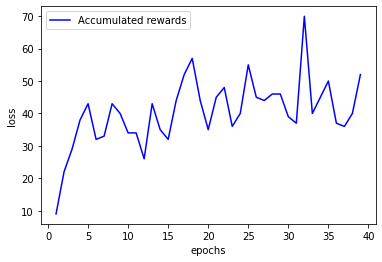

400000it [16:40, 399.75it/s, total reward=1616.0]                            


In [6]:
simulator.run()